# **Multi Layer Perceptron in Data Science**

## **Written by:** Aarish Asif Khan

## **Date:** 5 March 2024

In [48]:
# Import libraries
import tensorflow as tf
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
# Load `tips` dataset
tips = sns.load_dataset('tips')

In [50]:
# Pre-processing
# Converting categorical variables to dummy variables
tips = pd.get_dummies(tips, drop_first=True)

In [51]:
# Selecting features and target (predicting 'tip' based on other features)
X = tips.drop('tip', axis=1)
y = tips['tip']

In [52]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [53]:
# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', 
                          input_shape=(X_train.shape[1],)), # Input layer
    
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    
    tf.keras.layers.Dense(1)  # Output layer for regression
])

c:\Users\nawaz\miniconda3\envs\tf_env\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [56]:
# Training the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test, y_test))

Epoch 1/100


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 13.1550 - mae: 3.2416 - val_loss: 7.3111 - val_mae: 2.4896
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.5621 - mae: 2.8592 - val_loss: 5.5617 - val_mae: 2.0955
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.8477 - mae: 2.5530 - val_loss: 4.2230 - val_mae: 1.7356
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.1982 - mae: 2.2332 - val_loss: 3.2048 - val_mae: 1.4336
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.3136 - mae: 1.7844 - val_loss: 2.4277 - val_mae: 1.1897
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.7951 - mae: 1.4573 - val_loss: 1.9075 - val_mae: 1.0701
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.9335 - mae: 1.2579 - val_loss: 1.6038 - val_mae: 1.0151
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.2891 - mae: 1.1435 - val_loss: 1.4696 - val_mae: 0.9761
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.0497 - mae: 1.0787 - v

In [57]:
# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
print('Mean Squared Error: ', loss[0])

Mean Squared Error:  1.0756175518035889


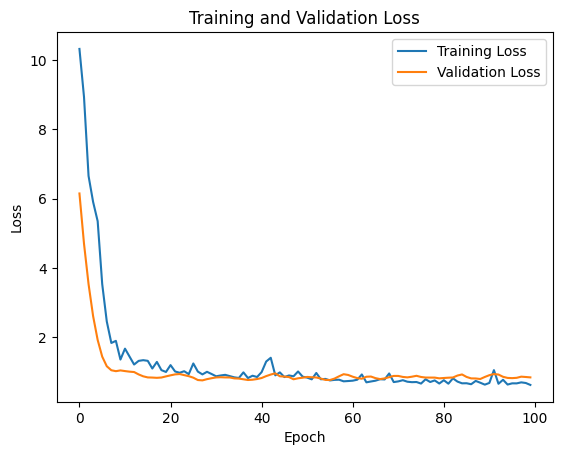

In [59]:
# Plotting the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.title('Training and Validation Loss')
plt.legend()
plt.show()

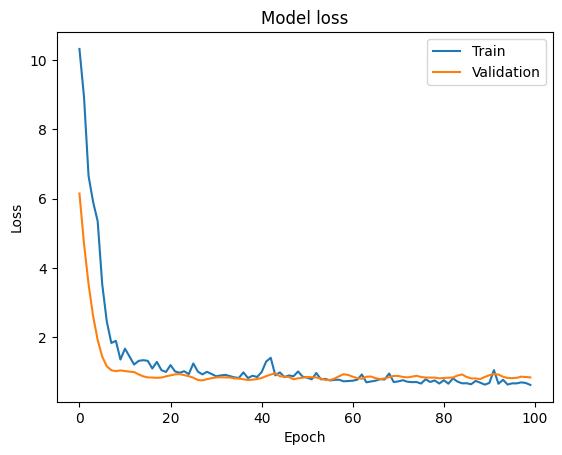

In [58]:
# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model and plot the training and testing loss and accuracy at each epoc
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_test, y_test))

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss

# Plotting the training and testing loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# **Early-Stopping Function**

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 9.9502 - val_loss: 5.1161
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7.9710 - val_loss: 3.8197
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.6395 - val_loss: 2.6528
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.4739 - val_loss: 1.6843
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 3.4047 - val_loss: 1.0696
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.8984 - val_loss: 0.8612
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.6757 - val_loss: 0.9543
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.4294 - val_loss: 1.0264
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.2899 - val_loss: 1.0452
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.2769 - val_loss: 0.9726
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.1972 - val_loss: 0.9251


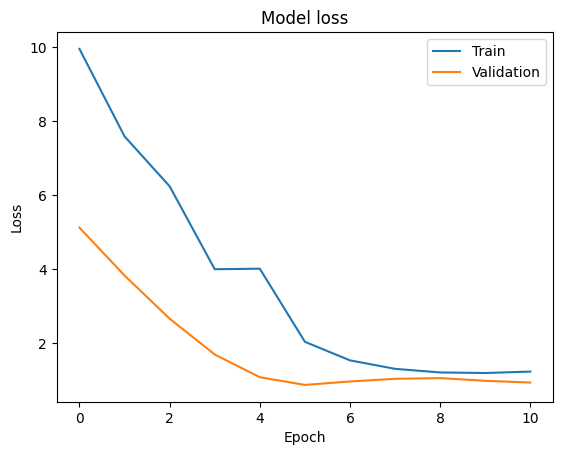

In [60]:
from tensorflow.keras.callbacks import EarlyStopping

# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define the callback function
early_stopping = EarlyStopping(patience=5)

# Train the model with the callback function
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss

# Plotting the training and testing loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()